# Chapter 4

This focuses on the variational method to solve computational chemistry problems.  This uses the fact that approximations give higher energy results, so that one can optimize parameteres to approach the true result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
import cmath as cmat
import scipy.optimize as optimize

def integrate(x,y):
    result=0
    for i in range(1,y.size):
        temp=(y[i]+y[i-1])/2*(x[i]-x[i-1])
        result+=temp
    return result

## Lets start with Particle in a Box

In [2]:
def psiPIB(n,x,L):
    return math.sqrt(2/L)*math.sin(n*math.pi*x/L)

def energyPIB(n,L):
    return math.pi**2*n**2/(2*L*L)

### First variation

0.20000
1.32


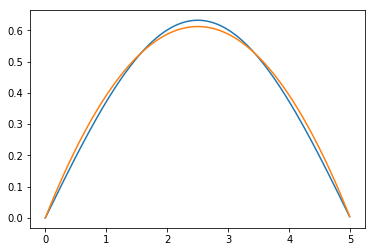

In [3]:
def trialPIB(x,L):
    return x*(L-x)


L=5
a=.01
nPoints=int(L/a)

x=np.array([])
trial=np.array([])
exact=np.array([])
for i in range(nPoints):
    x=np.append(x,[i*a])
    trial=np.append(trial,[trialPIB(x[i],L)])
    exact=np.append(exact,[psiPIB(1,x[i],L)])
    


trial2=trial*trial
norm=integrate(x,trial2)

trial=trial/math.sqrt(norm)

derive=np.array([])
for i in range(nPoints):
    if i==0: derive=np.append(derive,[(trial[i+1]-2*trial[i])/a/a])
    elif i==nPoints-1: derive=np.append(derive,[(trial[i-1]-2*trial[i])/a/a])
    else: derive=np.append(derive,[(trial[i+1]+trial[i-1]-2*trial[i])/a/a])


plt.plot(x,exact)
plt.plot(x,trial)

value=integrate(x,trial*(-1/2)*derive)
print("{0:.5f}".format(value))
print("{0:.2f}".format((value-energyPIB(1,5))/energyPIB(1,5)*100))

### More extreme parameters can greatly improve results with extra little cost

Notice the uses of scipy's optimize fucntion.  It takesa function with an arrayof parameters and lets you optimize it with constraints.  Notice here now that you MUST have a function returns what you want to optimize and takes in the parameters, even if the middle information is what you want.  You must reconstruct the data with the inside info.

In [4]:
def trialPIB(var,x):
    a,b,c,d,e,f=var
    return a+b*x+c*x**2+d*x**3+d*x**4+f*x**5
def energy(variables):
    a=.01
    L=5
    nPoints=int(L/a)
    x=np.array([])
    for i in range(nPoints):
        x=np.append(x,[i*a])
        
    trial=np.array([])
    for i in range(nPoints):
        trial=np.append(trial,[trialPIB(variables,x[i])])
        
    trial2=trial*trial
    norm=integrate(x,trial2)
    trial=trial/math.sqrt(norm)
    
    derive=np.array([])
    for i in range(nPoints):
        if i==0: derive=np.append(derive,[(trial[i+1]-2*trial[i])/a/a])
        elif i==nPoints-1: derive=np.append(derive,[(trial[i-1]-2*trial[i])/a/a])
        else: derive=np.append(derive,[(trial[i+1]+trial[i-1]-2*trial[i])/a/a])
            
    return integrate(x,trial*(-1/2)*derive)

L=5

def c1(var):
    a,b,c,d,e,f=var
    x=0
    return a+b*x+c*x**2+d*x**3+d*x**4+f*x**5
def c2(var):
    a,b,c,d,e,f=var
    x=5
    return a+b*x+c*x**2+d*x**3+d*x**4+f*x**5
def c3(var):
    a,b,c,d,e,f=var
    x=.1
    return a+b*x+c*x**2+d*x**3+d*x**4+f*x**5

take1=np.array([0,5,-1,0,0,0])
result= optimize.minimize(energy,take1,
                          constraints=({"fun":c1,"type":"eq"},
                                       {"fun":c2,"type":"eq"},
                                       {"fun":c3,"type":"ineq"}))
print(result)

     fun: 0.19756709231619946
     jac: array([ -0.03415812,  -0.04845324,  -0.24229393,  -7.25864591,
         0.        , -30.21117931])
 message: 'Optimization terminated successfully.'
    nfev: 76
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 0.        ,  5.08601207, -0.563176  , -0.04231133,  0.        ,
        0.00652251])


0.19757
0.09


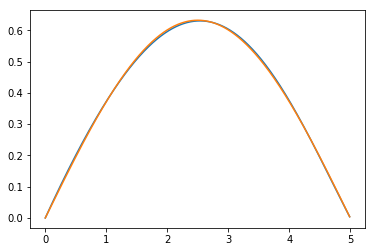

In [5]:
a=.01
L=5
nPoints=int(L/a)
x=np.array([])
for i in range(nPoints):
    x=np.append(x,[i*a])
       
trial=np.array([])
for i in range(nPoints):
    trial=np.append(trial,[trialPIB(result.x,x[i])])

trial2=trial*trial
norm=integrate(x,trial2)
trial1=trial/math.sqrt(norm)

plt.plot(x,trial1)
plt.plot(x,exact)

derive=np.array([])
for i in range(nPoints):
    if i==0: derive=np.append(derive,[(trial1[i+1]-2*trial1[i])/a/a])
    elif i==nPoints-1: derive=np.append(derive,[(trial1[i-1]-2*trial1[i])/a/a])
    else: derive=np.append(derive,[(trial1[i+1]+trial1[i-1]-2*trial1[i])/a/a])

value=integrate(x,trial1*(-1/2)*derive)
print("{0:.5f}".format(value))
print("{0:.2f}".format((value-energyPIB(1,5))/energyPIB(1,5)*100))

### Something extra, trying to orthogonalize the PIB1 to get PIB2

In [6]:
def trialPIB(var,x):
    a,b,c,d,e,f,g,h=var
    return a+b*x+c*x**2+d*x**3+d*x**4+f*x**5+g*x**6+h*x**7#+i*x**8+j*x**9
def energy(variables):
    a=.01
    L=5
    nPoints=int(L/a)
    x=np.array([])
    for i in range(nPoints):
        x=np.append(x,[i*a])
        
    trial=np.array([])
    for i in range(nPoints):
        trial=np.append(trial,[trialPIB(variables,x[i])])
        
    trial2=trial*trial
    norm=integrate(x,trial2)
    trial=trial/math.sqrt(norm)
    
    derive=np.array([])
    for i in range(nPoints):
        if i==0: derive=np.append(derive,[(trial[i+1]-2*trial[i])/a/a])
        elif i==nPoints-1: derive=np.append(derive,[(trial[i-1]-2*trial[i])/a/a])
        else: derive=np.append(derive,[(trial[i+1]+trial[i-1]-2*trial[i])/a/a])
            
    return integrate(x,trial*(-1/2)*derive)

L=5

def c1(var):
    return trialPIB(var,0)
def c2(var):
    return trialPIB(var,5)
def c3(var):
    return trialPIB(var,0.1)
def ortho1(var):
    a=.01
    L=5
    nPoints=int(L/a)
    x=np.array([])
    for i in range(nPoints):
        x=np.append(x,[i*a])
        
    trial=np.array([])
    for i in range(nPoints):
        trial=np.append(trial,[trialPIB(var,x[i])])
        
    trial2=trial*trial
    norm=integrate(x,trial2)
    trial=trial/math.sqrt(norm)
    
    thing=integrate(x,trial*trial1)
    return thing


take1=result.x
take1=np.append(take1,[0,0])
result2= optimize.minimize(energy,take1,
                          bounds=((-10,10),(-10,10),(-10,10),(-10,10),(-10,10),(-10,10),(-10,10),(-10,10)),
                          constraints=({"fun":c1,"type":"eq"},
                                       {"fun":c2,"type":"eq"},
                                       {"fun":c3,"type":"ineq"},
                                       {"fun":ortho1,"type":"eq"}))
print(result2)

     fun: 0.819923305943399
     jac: array([-9.22173262e-03,  7.04536065e-02,  3.57751057e-01,  1.04989669e+01,
        0.00000000e+00,  4.34623479e+01,  2.16249325e+02,  1.07646344e+03])
 message: 'Optimization terminated successfully.'
    nfev: 533
     nit: 50
    njev: 49
  status: 0
 success: True
       x: array([ 0.        ,  9.99361914,  9.48074578, -3.6842728 ,  0.        ,
        1.79920196, -0.25993819,  0.01171515])


0.81992
3.84


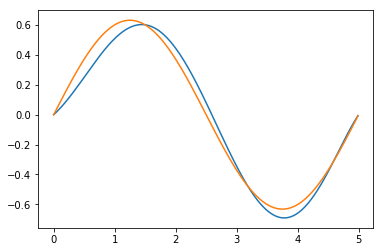

In [7]:
a=.01
L=5
nPoints=int(L/a)
x=np.array([])
for i in range(nPoints):
    x=np.append(x,[i*a])
       
trial=np.array([])
exact=np.array([])
for i in range(nPoints):
    trial=np.append(trial,[trialPIB(result2.x,x[i])])
    exact=np.append(exact,[psiPIB(2,x[i],5)])

norm=integrate(x,trial*trial)
trial2=trial/math.sqrt(norm)

plt.plot(x,trial2)
plt.plot(x,exact)

derive=np.array([])
for i in range(nPoints):
    if i==0: derive=np.append(derive,[(trial2[i+1]-2*trial2[i])/a/a])
    elif i==nPoints-1: derive=np.append(derive,[(trial2[i-1]-2*trial2[i])/a/a])
    else: derive=np.append(derive,[(trial2[i+1]+trial2[i-1]-2*trial2[i])/a/a])

value=integrate(x,trial2*(-1/2)*derive)
print("{0:.5f}".format(value))
print("{0:.2f}".format((value-energyPIB(2,5))/energyPIB(2,5)*100))

## The Hydrogen Atom can be described by Variational approximations